# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# 导入数据
data = pd.read_csv('../data/train/train.csv')
data.head(5)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1


In [46]:
data.describe()
# 这里只能看到一些数值型特征的统计

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [47]:
# 利用data.info()查看总体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

In [80]:
data['trainee_engagement_rating'].value_counts()

1.0    17200
2.0    11669
4.0     8870
3.0     7709
5.0     3778
Name: trainee_engagement_rating, dtype: int64

In [48]:
data.isnull().sum()
# 先总体看一下缺失值情况

id_num                           0
program_type                   731
program_id                     699
program_duration               675
test_id                        725
test_type                      702
difficulty_level               703
trainee_id                     739
gender                         707
education                      702
city_tier                      700
age                          19379
total_programs_enrolled        692
is_handicapped                 718
trainee_engagement_rating      772
is_pass                          0
dtype: int64

In [45]:
_pass = data[data['is_pass']==1]
_nopass = data[data['is_pass']==0]
pass_col = "blue"
nopass_col = "red"

print("Pass: %d (%.1f percent), Not Pass: %d (%.1f percent), Total: %i"\
      %(len(_pass), 1.*len(_pass)/len(data)*100.0,\
        len(_nopass), 1.*len(_nopass)/len(data)*100.0, len(data)))

Pass: 34813 (69.6 percent), Not Pass: 15185 (30.4 percent), Total: 49998


在数据集中，百分之69.6的学员通过测试，也就是说， 全提交一都有69.6的准确率...一言难尽

在此处定义了颜色，用于区分通过/未通过。接下来要逐一检查这些特征，看到通过和未通过的分布比较。用直方图。分类特征，用柱状图+标准差柱状图

<AxesSubplot:xlabel='trainee_engagement_rating', ylabel='is_pass'>

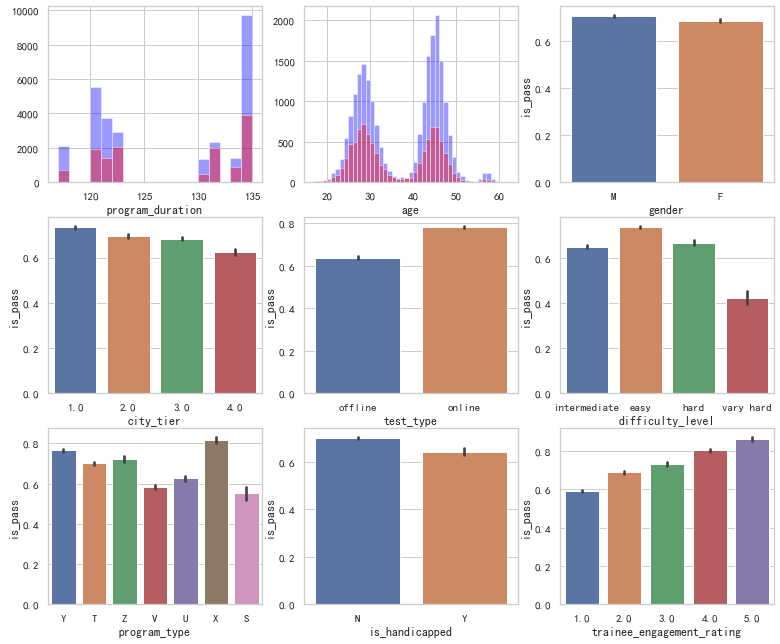

In [88]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[13,11])# 每个图的大小
# program_duration
plt.subplot(331) # 330是图表的名字，下同
sns.distplot(_pass['program_duration'].dropna().values, bins=range(117, 136, 1), kde=False, color=pass_col, ) # 117是最小值,136是最大值
sns.distplot(_nopass['program_duration'].dropna().values, bins=range(117, 136, 1), kde=False, color=nopass_col,
            axlabel='program_duration')

# age特征
plt.subplot(332)
sns.distplot(_pass['age'].dropna().values, bins=range(17, 63, 1), kde=False, color=pass_col, ) # 17是最小年龄，63是最大年龄
sns.distplot(_nopass['age'].dropna().values, bins=range(17, 63, 1), kde=False, color=nopass_col,
            axlabel='age')

# gender特征
plt.subplot(333) 
sns.barplot(x='gender', y='is_pass', data=data) # data是我们导入的dataframe，它从中找到对应的x和y进行绘图，下同

# city_tier
plt.subplot(334)
sns.barplot('city_tier', 'is_pass', data=data)

# test_type
plt.subplot(335)
sns.barplot('test_type', 'is_pass', data=data)

# difficulty_level
plt.subplot(336)
sns.barplot('difficulty_level', 'is_pass', data=data)

# program_type
plt.subplot(337)
sns.barplot('program_type', 'is_pass', data=data)

# is_handicapped
plt.subplot(338)
sns.barplot('is_handicapped', 'is_pass', data=data)

# trainee_engagement_rating
plt.subplot(339)
sns.barplot('trainee_engagement_rating', 'is_pass', data=data)


<AxesSubplot:xlabel='education', ylabel='is_pass'>

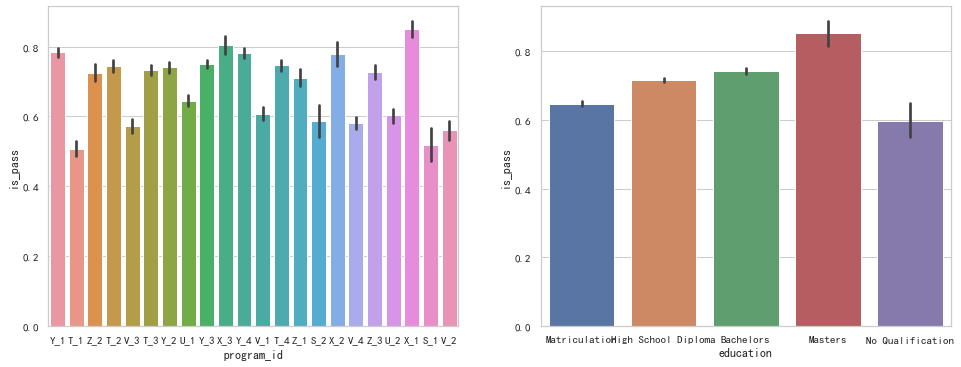

In [81]:
# program_id
plt.figure(figsize=[25,20])
plt.subplot(337)
sns.barplot('program_id', 'is_pass', data=data)

# education
plt.subplot(338)
sns.barplot('education', 'is_pass', data=data)
